## Objective: 

In these project we're looking to predict the fare for their future transactional cases. And company delivery services to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. So, it becomes really important to estimate the fare prices accurately. 

In [1]:
#Importing required libraries
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score   

%matplotlib inline

In [2]:
#Loading the data:
train  = pd.read_csv("Desktop/test/train.csv")
test = pd.read_csv("Desktop/test/test.csv")

## Understanding the data :

In [3]:
train.head() #checking first five rows of the training dataset

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-06-15 22:37:37.0000002,6.1,2010-06-15 22:37:37 UTC,-73.987103,40.736700,-73.979968,40.722660,1
1,2012-01-15 05:05:00.00000038,5.3,2012-01-15 05:05:00 UTC,-73.945183,40.802335,-73.940880,40.792632,5
2,2014-08-08 13:41:56.0000002,11.0,2014-08-08 13:41:56 UTC,-73.981187,40.781080,-73.952317,40.775680,2
3,2011-02-15 13:54:00.000000178,6.5,2011-02-15 13:54:00 UTC,-73.994452,40.740643,-73.988440,40.752680,3
4,2011-06-03 15:41:06.0000002,8.1,2011-06-03 15:41:06 UTC,-73.969300,40.759800,-73.988000,40.731900,0


In [4]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
train.drop('key',axis=1,inplace=True)
test.drop('key',axis=1,inplace=True)

In [6]:
print("shape of training data is: ",train.shape) #checking the number of rows and columns in training data
print("shape of testing data is: ",test.shape) #checking the number of rows and columns in testing data

shape of training data is:  (13005478, 7)
shape of testing data is:  (9914, 6)


In [7]:
train.dtypes #checking the data-types in training dataset

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Here we can see pickup datetime and fare amount is of object type. So we need to change the data type of both.

In [9]:
train.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.300548e+07,1.300548e+07,1.300548e+07,1.300539e+07,1.300539e+07,1.300548e+07
mean,1.133957e+01,-7.251155e+01,3.992273e+01,-7.251334e+01,3.992424e+01,1.685242e+00
std,9.835297e+00,1.280082e+01,9.273872e+00,1.286023e+01,9.566211e+00,1.324736e+00
min,-3.000000e+02,-3.439245e+03,-3.475482e+03,-3.428044e+03,-3.475482e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075265e+01,-7.398014e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396707e+01,4.076713e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,3.130300e+03,3.454855e+03,3.352849e+03,3.445035e+03,3.351468e+03,2.080000e+02


In [10]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Data Cleaning & Missing Value Analysis :

In [11]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [12]:
train.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,6.1,2010-06-15 22:37:37 UTC,-73.987103,40.736700,-73.979968,40.722660,1
1,5.3,2012-01-15 05:05:00 UTC,-73.945183,40.802335,-73.940880,40.792632,5
2,11.0,2014-08-08 13:41:56 UTC,-73.981187,40.781080,-73.952317,40.775680,2
3,6.5,2011-02-15 13:54:00 UTC,-73.994452,40.740643,-73.988440,40.752680,3
4,8.1,2011-06-03 15:41:06 UTC,-73.969300,40.759800,-73.988000,40.731900,0
...,...,...,...,...,...,...,...
13005473,15.3,2009-09-17 17:30:59 UTC,-73.946428,40.772953,-73.999922,40.738704,1
13005474,5.7,2012-04-03 23:07:16 UTC,-73.983584,40.725945,-73.992779,40.717914,1
13005475,5.3,2009-06-18 19:17:00 UTC,-73.994840,40.739113,-73.996813,40.744558,2
13005476,5.7,2011-02-28 20:42:00 UTC,-73.994842,40.760165,-73.980780,40.778217,2


In [13]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [14]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [15]:
train.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [16]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [17]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [18]:
test.dtypes #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

#### Observations :

1. Passenger count should not exceed 6(even if we consider SUV)
2. Latitudes range from -90 to 90. Longitudes range from -180 to 180
3. Few missing values and High values of fare and Passenger count are present. So, decided to remove them.

Checking the Datetime Variable : 

In [19]:
#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)

(13005478, 13)


In [20]:
print(train['pickup_datetime'].isnull().sum())

0


Checking the passenger count variable : 

In [21]:
train["passenger_count"].describe()

count    1.300548e+07
mean     1.685242e+00
std      1.324736e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [22]:
train["passenger_count"].max()

208

We can see maximum number of passanger count is 208 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [23]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [24]:
#Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [25]:
train["passenger_count"].describe()

count    1.295928e+07
mean     1.691033e+00
std      1.307013e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [26]:
train["passenger_count"].sort_values(ascending= True)

0           1
7886348     1
7886349     1
7886352     1
7886354     1
           ..
12640700    6
4562313     6
6432291     6
3262278     6
3970379     6
Name: passenger_count, Length: 12959277, dtype: int64

In [27]:
#removing passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(12959277, 13)
0


Next checking the Fare Amount variable :

In [28]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

506793      3130.30
7294982     2004.50
12872593     957.00
3893276      900.00
9400995      724.21
             ...   
5462396      -95.00
2466532     -107.75
5235270     -145.00
7887685     -176.00
466269      -300.00
Name: fare_amount, Length: 12959277, dtype: float64

In [29]:
Counter(train["fare_amount"]<0)

Counter({False: 12958670, True: 607})

In [30]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(12958670, 13)

In [31]:
##make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

0.0

In [32]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(12958208, 13)

In [35]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

train = train.drop(train[train["fare_amount"]> 500 ].index, axis=0)
train.shape

(12958200, 13)

In [36]:
train["fare_amount"].sort_values(ascending=False)

6808447     500.00
7761388     499.00
5641355     499.00
1471358     499.00
12810341    498.65
             ...  
5677116       1.00
8800647       1.00
12705481      1.00
6616308       1.00
2107228       1.00
Name: fare_amount, Length: 12958200, dtype: float64

In [37]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(12958200, 13)
0


In [38]:
train["fare_amount"].describe()

count    1.295820e+07
mean     1.134852e+01
std      9.775080e+00
min      1.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.000000e+02
Name: fare_amount, dtype: float64

Now checking the pickup lattitude and longitude :

In [39]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
47947,14.1,2011-10-15 15:47:00,-73.974778,406.216667,-73.963827,40.792837,1,2011,10,15,5,15,47
137518,7.0,2013-01-31 15:38:00,0.000000,2041.240317,-73.978397,40.759842,1,2013,1,31,3,15,38
200417,6.9,2011-10-17 21:30:00,-73.975193,404.850000,-73.983833,40.769717,6,2011,10,17,0,21,30
249723,7.7,2011-08-24 21:48:00,1121.371622,330.129795,1754.725060,-427.646528,1,2011,8,24,2,21,48
382615,18.5,2011-05-10 11:01:00,-1249.812805,506.269745,3439.455565,2958.601502,1,2011,5,10,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633297,6.1,2011-06-24 22:25:00,420.913503,535.642890,-2245.254872,2993.515333,1,2011,6,24,4,22,25
12754085,6.5,2009-06-06 21:31:00,-73.842212,615.310293,-73.842212,615.310293,1,2009,6,6,5,21,31
12786327,3.7,2012-03-25 02:49:00,2084.697707,899.232937,-1326.667547,-2849.085388,1,2012,3,25,6,2,49
12813153,20.1,2011-11-03 00:34:00,-3325.938403,1264.119402,-1329.512050,-1694.338285,1,2011,11,3,3,0,34


In [40]:
#Hence dropping one value of >90
train.drop((train[train['pickup_latitude']<-90]).index, axis=0,inplace=True)
train.drop((train[train['pickup_latitude']>90]).index, axis=0,inplace=True)

In [42]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
731504,8.1,2011-10-06 07:31:00,787.246387,-80.880182,787.246387,-80.880182,1,2011,10,6,3,7,31
1633627,42.5,2011-06-04 12:32:00,833.386565,-2.595688,1707.203463,2980.782555,1,2011,6,4,5,12,32
2542307,10.5,2011-08-18 00:01:00,757.866575,-80.926848,-554.935360,3351.403027,1,2011,8,18,3,0,1
4049306,16.9,2011-06-04 07:09:00,3383.517112,-86.502535,1124.202792,291.055042,1,2011,6,4,5,7,9
4418465,16.1,2011-05-02 08:53:00,2084.694373,-19.364388,-2653.507012,682.431815,1,2011,5,2,0,8,53
8190466,17.3,2011-09-07 22:42:00,1547.815547,-79.458763,1547.815547,-79.458763,1,2011,9,7,2,22,42
8198015,5.7,2011-07-01 08:53:00,1662.459703,-44.548278,402.768385,-402.454305,1,2011,7,1,4,8,53
9305077,5.3,2011-09-04 19:23:00,2157.301527,-50.152285,2157.301527,-50.152285,1,2011,9,4,6,19,23
12838791,3.7,2011-10-25 20:05:00,3454.854513,-47.297782,2101.491407,-2889.644893,1,2011,10,25,1,20,5


In [43]:
#Hence dropping one value of >90
train.drop((train[train['pickup_longitude']<-180]).index, axis=0,inplace=True)
train.drop((train[train['pickup_longitude']>180]).index, axis=0, inplace=True)

In [45]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
34895,7.3,2011-09-25 12:12:00,-73.969250,40.798597,-73.957567,95.633333,1,2011,9,25,6,12,12
235347,8.9,2012-04-07 18:54:00,-73.991532,40.742245,0.000000,473.987042,1,2012,4,7,5,18,54
490252,8.1,2010-08-22 17:50:00,-73.873002,40.774092,-73.959275,404.700000,1,2010,8,22,6,17,50
577454,6.1,2011-10-29 16:13:00,-73.982320,40.775140,-73.960860,406.033332,1,2011,10,29,5,16,13
761931,6.1,2012-04-23 22:43:00,-73.974882,40.755162,-73.978817,404.733332,1,2012,4,23,0,22,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12048310,4.5,2012-06-01 22:33:00,-74.013132,40.715597,-0.066667,234.054000,1,2012,6,1,4,22,33
12382098,6.1,2012-03-09 10:02:00,-73.982415,40.735777,-73.971752,404.883332,1,2012,3,9,4,10,2
12941539,10.5,2012-05-03 19:25:00,-73.988972,40.773705,-73.954950,404.116667,2,2012,5,3,3,19,25
12948563,4.5,2011-11-17 16:52:00,-1.100000,0.000000,0.000000,400.191755,1,2011,11,17,3,16,52


In [46]:
train.drop((train[train['dropoff_latitude']<-90]).index, axis=0,inplace=True)
train.drop((train[train['dropoff_latitude']>90]).index, axis=0,inplace=True)

In [47]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
12512436,6.5,2013-06-19 09:09:00,-73.977688,40.753748,636.662867,40.761505,6,2013,6,19,2,9,9


In [48]:
train.drop((train[train['dropoff_longitude']<-180]).index, axis=0,inplace=True)
train.drop((train[train['dropoff_longitude']>180]).index, axis=0,inplace=True)

In [50]:
train.shape

(12957559, 13)

In [51]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [53]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

### Now we have successfully cleared our both datasets. Thus proceeding for further operations:

Calculating distance based on the given coordinates :


In [54]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [55]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [56]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [57]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,6.1,2010-06-15 22:37:37,-73.987103,40.736700,-73.979968,40.722660,1,2010,6,15,1,22,37,1.672942
1,5.3,2012-01-15 05:05:00,-73.945183,40.802335,-73.940880,40.792632,5,2012,1,15,6,5,5,1.138102
2,11.0,2014-08-08 13:41:56,-73.981187,40.781080,-73.952317,40.775680,2,2014,8,8,4,13,41,2.503956
3,6.5,2011-02-15 13:54:00,-73.994452,40.740643,-73.988440,40.752680,3,2011,2,15,1,13,54,1.431069
5,4.1,2012-05-03 08:42:00,-73.991595,40.754535,-73.983505,40.751178,1,2012,5,3,3,8,42,0.776991


In [58]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323260
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [59]:
train.nunique()

fare_amount              5767
pickup_datetime       7934047
pickup_longitude       225949
pickup_latitude        253900
dropoff_longitude      295936
dropoff_latitude       335493
passenger_count             6
year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
Minute                     60
distance             12584438
dtype: int64

In [60]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9125
pickup_latitude      9247
dropoff_longitude    9142
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [61]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

1594508     10003.498873
9324867      9994.811818
9401952      9946.342788
10675120     9749.934087
7488056      9542.246703
                ...     
4361922         0.000000
12521741        0.000000
10499066        0.000000
8827495         0.000000
769908          0.000000
Name: distance, Length: 12957559, dtype: float64

As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance they have travelled
Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some outliers
We need to remove these values


In [62]:
Counter(train['distance'] == 0)

Counter({False: 12587667, True: 369892})

In [63]:
Counter(train['fare_amount'] == 0)

Counter({False: 12957559})

In [64]:
###we will remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(12587667, 14)

In [69]:
Counter(train['distance'] > 200)

Counter({False: 12561732, True: 25935})

In [81]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 80 ].index, axis=0)
train.shape

(12557534, 14)

In [83]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,6.1,2010-06-15 22:37:37,-73.987103,40.736700,-73.979968,40.722660,1,2010,6,15,1,22,37,1.672942
1,5.3,2012-01-15 05:05:00,-73.945183,40.802335,-73.940880,40.792632,5,2012,1,15,6,5,5,1.138102
2,11.0,2014-08-08 13:41:56,-73.981187,40.781080,-73.952317,40.775680,2,2014,8,8,4,13,41,2.503956
3,6.5,2011-02-15 13:54:00,-73.994452,40.740643,-73.988440,40.752680,3,2011,2,15,1,13,54,1.431069
5,4.1,2012-05-03 08:42:00,-73.991595,40.754535,-73.983505,40.751178,1,2012,5,3,3,8,42,0.776991


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [84]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [85]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,6.1,1,2010,6,15,1,22,1.672942
1,5.3,5,2012,1,15,6,5,1.138102
2,11.0,2,2014,8,8,4,13,2.503956
3,6.5,3,2011,2,15,1,13,1.431069
5,4.1,1,2012,5,3,3,8,0.776991


In [86]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [87]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [88]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323260
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [89]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [93]:
train.shape

(12557534, 8)

In [94]:
test.shape

(9914, 7)

# Data Visualization :

Visualization of following:

1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

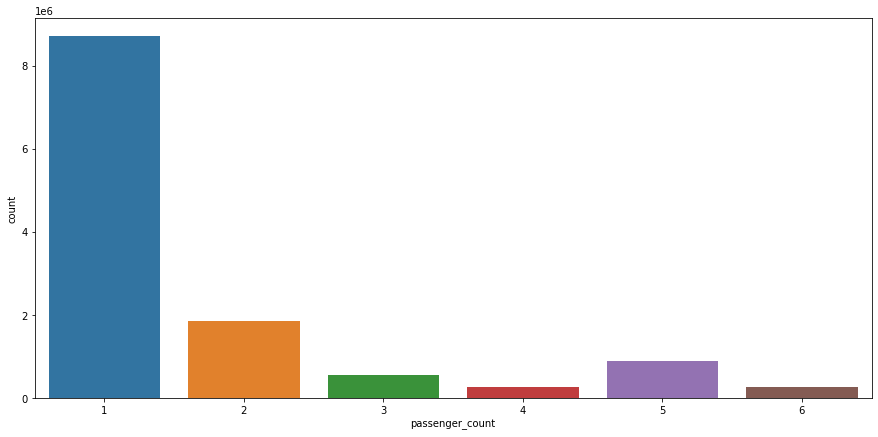

In [95]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

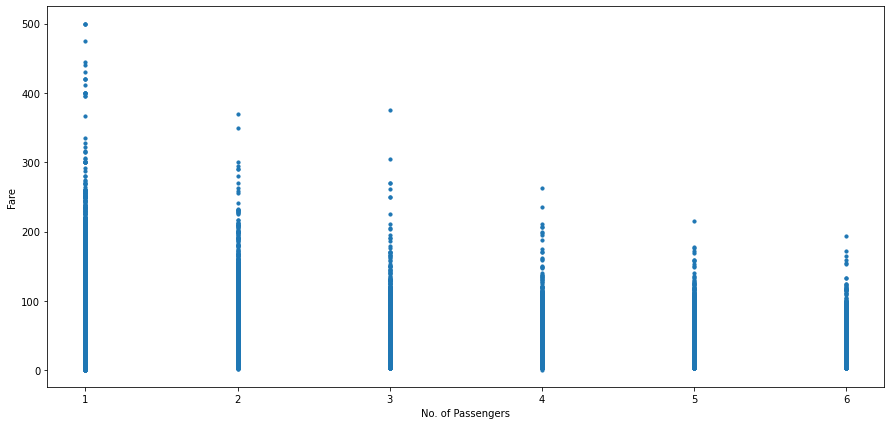

In [96]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

### Observations :
   By seeing the above plots we can easily conclude that:
1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

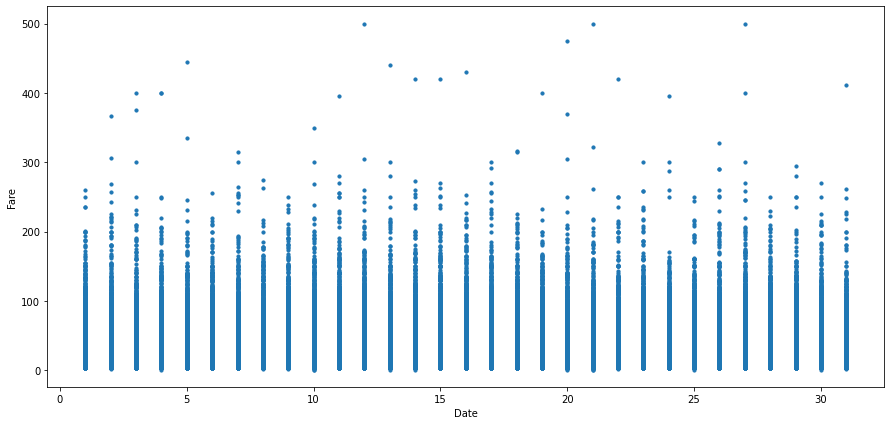

In [97]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

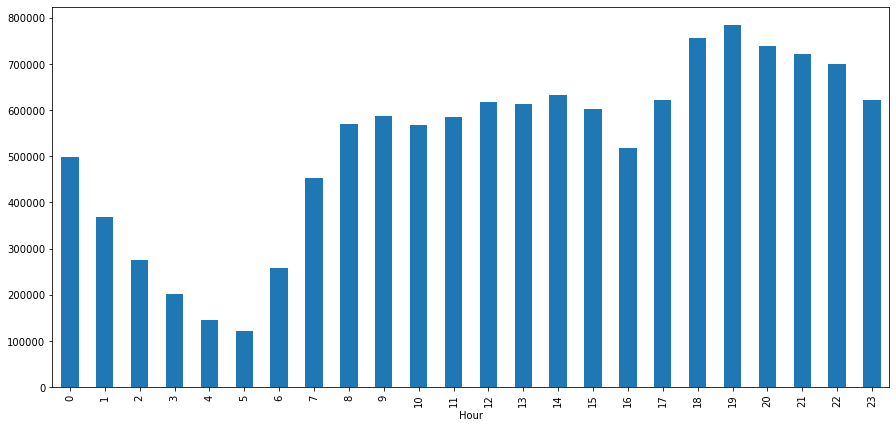

In [98]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

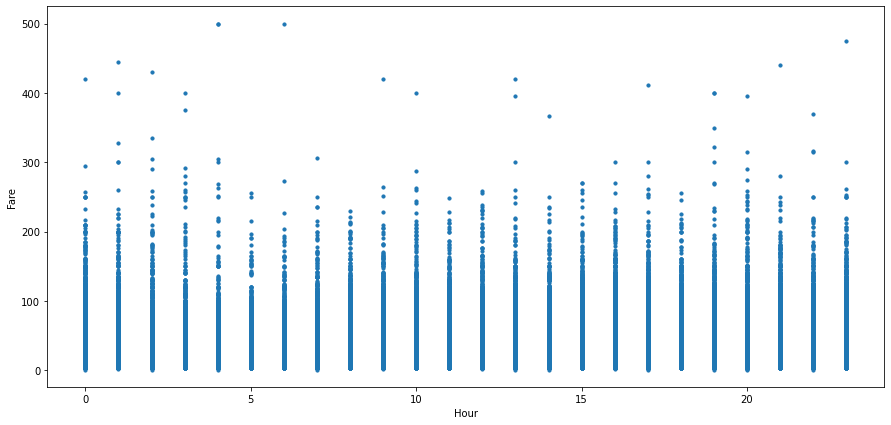

In [99]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 5 am and 23 Pm are the costliest. 
Hence we can assume that cabs taken early in morning and late at night are costliest


<AxesSubplot:xlabel='Day', ylabel='count'>

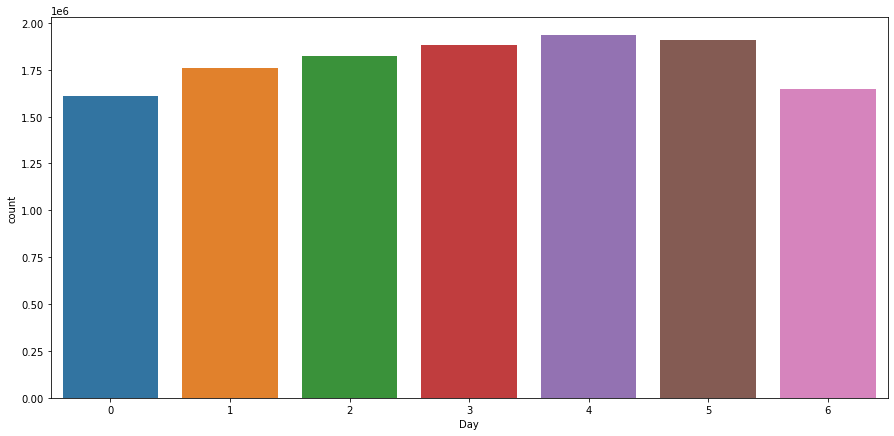

In [100]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

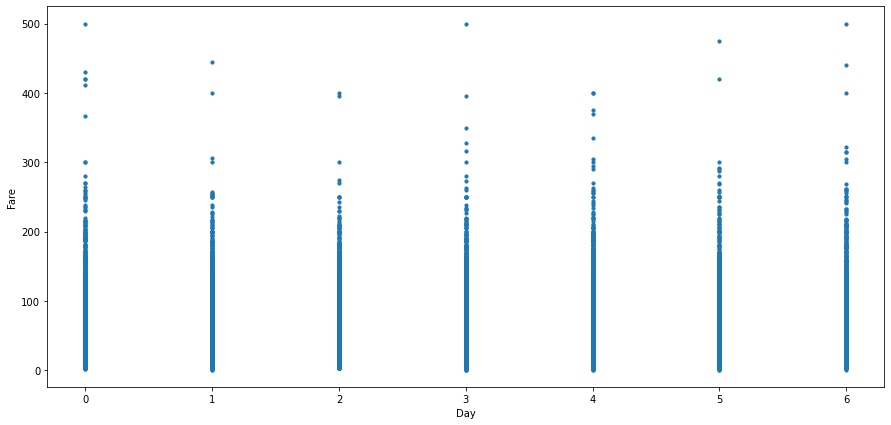

In [101]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

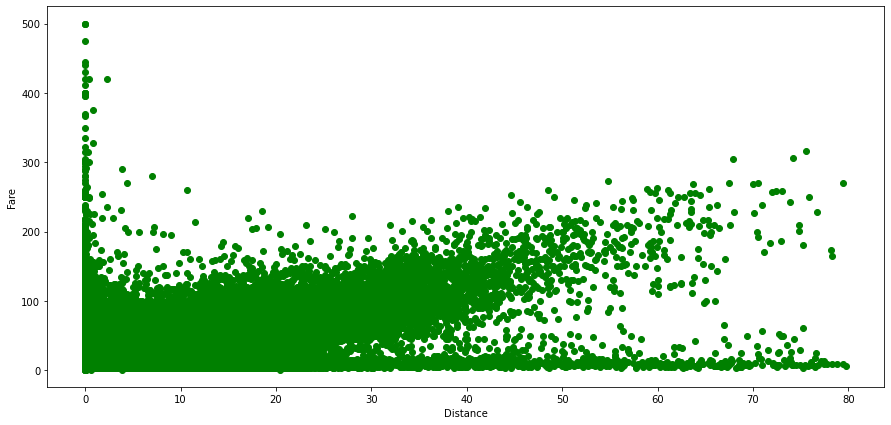

In [102]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

**It is quite obvious that distance will effect the amount of fare**

# Applying ML ALgorithms: 

In [107]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [108]:
print(X_train.shape)
print(X_test.shape)

(10046027, 7)
(2511507, 7)


### Linear Regression Model :

In [109]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [110]:
fit_LR.score(X_test, y_test)

0.7791571579038981

In [111]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [112]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [113]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [114]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.25585529562887804
Root Mean Squared Error For Test data = 0.25584809649285145


In [115]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.779081400848721

In [116]:
r2_score(y_test, pred_test_LR)

0.7791571579038981

**Save model using pickle**

In [117]:
import pickle

In [118]:
f = open('Fare_LR.h5','wb')
pickle.dump(fit_LR, f)
f.close()

### Decision tree Model : 

In [119]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [120]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [121]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [122]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.2922603940913941
Root Mean Squared Error For Test data = 0.29228945313115845


In [123]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7117406578384091

In [124]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7117659814823682

In [125]:
f = open('Fare_DT.h5','wb')
pickle.dump(fit_DT, f)
f.close()

# Prediction of fare from provided test dataset :

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using Linear Regression model

In [129]:
#Apply model on test data
predictions_GRF_test_Df = fit_LR.predict(test)

In [130]:
predictions_GRF_test_Df

array([ 3.27734379,  3.35813038,  1.80590429, ..., 16.63691187,
        8.03491969,  2.37078104])

In [131]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [132]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,2.323260,3.277344
1,1,2015,1,27,1,13,2.425353,3.358130
2,1,2011,10,8,5,11,0.618628,1.805904
3,1,2012,12,1,5,21,1.961033,2.922546
4,1,2012,12,1,5,21,5.387301,5.633757


In [133]:
test.to_csv('Predicted_fare.csv')